2.1:
    1) Load the CT dataset, define paths to the datasets, including a path to COVID and Non-COVID data.
    2) Open and display a random set of 9 images (COVID and non-COVID) from CT image dataset.
    3) Resize all images to 224x224 pixels.
    4) Plot label distribution of images: that is how many images per label for CT image dataset.
    5) Estimate image statistics: mean, max, min, standard deviation of pixel values in CT images.
    6) Plot histogram of image intensities for COVID and Non-COVID images from CT dataset.
    7) Compare histograms of COVID and Non-COVID images. How do they differ? What information do you get from the histograms?
    8) Convert all CT images from the COVID and Non-COVID directories in DICOM (.dcm) format.
    9) Save all file paths with their class labels to a CSV file.

(1)

In [4]:
from glob import glob

path_covid = '/media/ricardo/hd1/Ricardo/uca/COVID-CT-master/Images-processed/CT_COVID/'
path_normal = '/media/ricardo/hd1/Ricardo/uca/COVID-CT-master/Images-processed/CT_NonCOVID/'
path_covid_dicom = '/media/ricardo/hd1/Ricardo/uca/COVID-CT-master/DICOM/COVID/'
path_normal_dicom = '/media/ricardo/hd1/Ricardo/uca/COVID-CT-master/DICOM/Normal/'
dicom_csv_path = '/media/ricardo/hd1/Ricardo/uca/COVID-CT-master/DICOM'
png_covid  = glob(path_covid + '/*.png')
png_normal = glob(path_normal + '/*.png')

print("Imported",len(png_covid), "png for COVID path")
print("Imported",len(png_normal), "png for NORMAL path")

Imported 349 png for COVID path
Imported 195 png for NORMAL path


(2)(3)

Text(0.5, 0.98, 'COVID')

<Figure size 432x288 with 0 Axes>

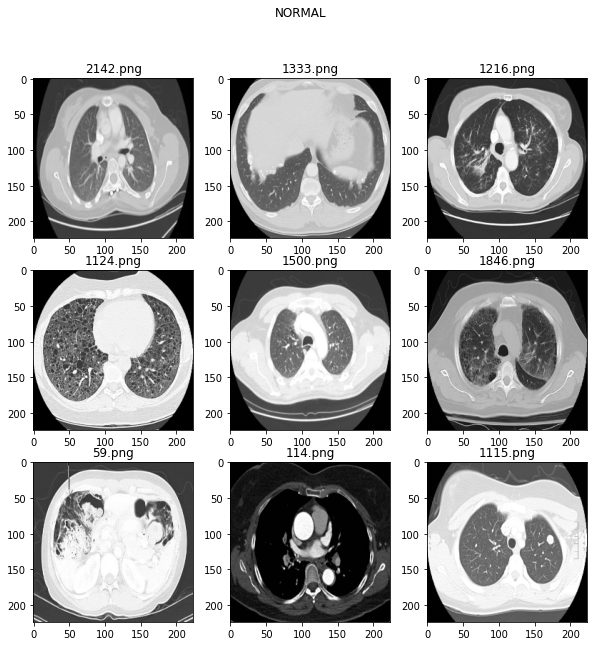

<Figure size 432x288 with 0 Axes>

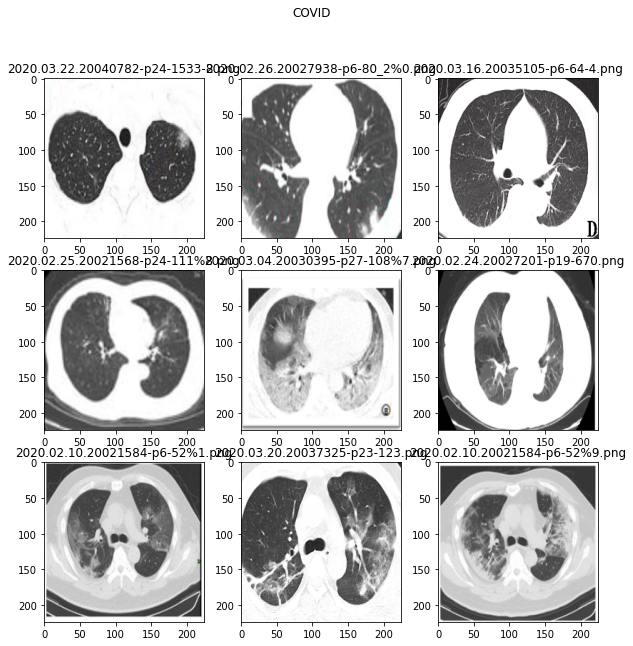

In [6]:
import cv2
import os
import matplotlib.pyplot as plot
import random

figsize = [10, 6]
fig = plot.figure()
fig, axs = plot.subplots(3, 3, figsize=(10,10))
for i, ax in enumerate(fig.axes):
    ii = random.randint(0,len(png_normal))
    pic = cv2.imread(png_normal[ii]) 
    pic = cv2.resize(pic,(224,224)) 
    ax= plot.subplot(3, 3, i+1)
    ax.imshow(pic)
    plot.title (os.path.basename(png_normal[ii]))
plot.suptitle('NORMAL')

fig = plot.figure()
fig, axs = plot.subplots(3, 3, figsize=(10,10))
for i, ax in enumerate(fig.axes):
    ii = random.randint(0,len(png_covid))
    pic = cv2.imread(png_covid[ii]) 
    pic = cv2.resize(pic,(224,224)) 
    ax= plot.subplot(3, 3, i+1)
    ax.imshow(pic)
    plot.title (os.path.basename(png_covid[ii]))
plot.suptitle('COVID')


(4) => Don't get what does it means. I've just printed 349 for COVID and 195 for Normal. It's just about making a pie chart?

(5)

In [8]:
from PIL import Image
from PIL.ImageStat import Stat

covid_ctstat = Image.open(png_covid[random.randint(0,len(png_covid))])
covid_stat = Stat(covid_ctstat)
print("COVID      mean:  ", covid_stat.mean)    
print("COVID  min, max:  ", covid_stat.extrema) 
print("COVID     stdev:  ",covid_stat.stddev)   
print("COVID  variance:  ",covid_stat.var)     
print("------------------------------------------")
normal_ctstat = Image.open(png_normal[random.randint(0,len(png_normal))])
normal_stat = Stat(normal_ctstat)
print("NORMAL     mean:  ", normal_stat.mean)    
print("NORMAL min, max:  ", normal_stat.extrema) 
print("NORMAL    stdev:  ",normal_stat.stddev)   
print("NORMAL variance:  ",normal_stat.var)     


COVID      mean:   [130.53341566838333, 130.64362101619645, 130.59462932900433]
COVID  min, max:   [(0, 255), (0, 255), (0, 255)]
COVID     stdev:   [104.99513725765331, 104.94646170934027, 104.97179267237233]
COVID  variance:   [11023.978847753458, 11013.759825310022, 11019.07725685152]
------------------------------------------
NORMAL     mean:   [161.9319347439499, 161.9319347439499, 161.9319347439499]
NORMAL min, max:   [(27, 255), (27, 255), (27, 255)]
NORMAL    stdev:   [77.07935269033479, 77.07935269033479, 77.07935269033479]
NORMAL variance:   [5941.22661116102, 5941.22661116102, 5941.22661116102]


(6)

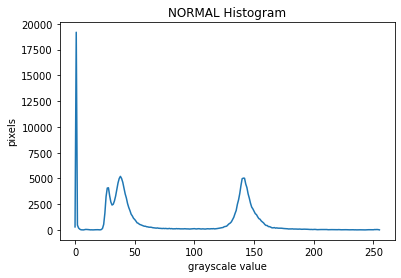

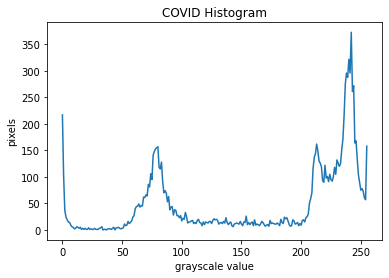

In [9]:
import numpy as np

img = cv2.imread(png_normal[random.randint(0,len(png_normal))],cv2.IMREAD_GRAYSCALE)
histr = cv2.calcHist([img],[0],None,[256],[0,256])
plot.plot(histr)
plot.title("NORMAL Histogram")
plot.xlabel("grayscale value")
plot.ylabel("pixels")
plot.show()

img = cv2.imread(png_covid[random.randint(0,len(png_covid))],cv2.IMREAD_GRAYSCALE)
histr = cv2.calcHist([img],[0],None,[256],[0,256])
plot.plot(histr)
plot.title("COVID Histogram")
plot.xlabel("grayscale value")
plot.ylabel("pixels")
plot.show()


(7) Intensity distribution of pixels where pixel value varies.

(8)

In [10]:
import SimpleITK as sitk

i=0
for png in png_covid:
  im1 = cv2.imread(png, cv2.IMREAD_GRAYSCALE)
  im1= np.array(im1)
  img= sitk.GetImageFromArray(im1)
  img = sitk.GetImageFromArray(im1)
  sitk.WriteImage(img,path_covid_dicom+'/COVID_'+ str(i)+'.dcm')
  i=i+1

i=0
for png in png_normal:
  im1 = cv2.imread(png, cv2.IMREAD_GRAYSCALE)
  im1= np.array(im1)
  img= sitk.GetImageFromArray(im1)
  img = sitk.GetImageFromArray(im1)
  sitk.WriteImage(img,path_normal_dicom+'/Normal_'+ str(i)+'.dcm')
  i=i+1
    

(9)

In [11]:
import pandas as pd

files = []
labels = []
df = pd.DataFrame(columns=['image_path', 'target'])

for file1 in sorted(os.listdir(path_covid_dicom)):
    files.append(path_covid_dicom+file1)  
    labels.append(str(1))

for file2 in sorted(os.listdir(path_normal_dicom)):
    files.append(path_normal_dicom+file2)  
    labels.append(str(0))
df['image_path']=files
df['target']=labels
df.to_csv(dicom_csv_path+'/dicom.csv', index=False)